In [32]:
import networkx as nx
import osmnx as ox
from shapely.geometry import Point, LineString
import plotly_express as px
import pandas as pd
import geopandas as gpd

In [33]:
ox.config(use_cache=True, log_console=True) #For debugging

2021-09-26 10:05:57 Configured OSMnx 1.1.1
2021-09-26 10:05:57 HTTP response caching is on


In [34]:
def create_rochester_graph(loc, dist, transport_mode, loc_type="address"):
    """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
    if loc_type == "address":
        roc_graph = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        roc_graph = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return roc_graph

2021-09-26 10:05:57 Retrieved response from cache file "cache/122893a9c77ace471118d977e4561a9f45117fb9.json"
2021-09-26 10:05:57 Geocoded "Rochester" to (43.157285, -77.615214)
2021-09-26 10:05:57 Created bbox 2500 m from (43.157285, -77.615214): 43.17976800838733,43.134801991612676,-77.58439335186361,-77.64603464813638
2021-09-26 10:05:58 Projected GeoDataFrame to +proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-09-26 10:05:58 Projected GeoDataFrame to epsg:4326
2021-09-26 10:05:58 Projected GeoDataFrame to +proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-09-26 10:05:58 Projected GeoDataFrame to epsg:4326
2021-09-26 10:05:58 Requesting data within polygon from API in 1 request(s)
2021-09-26 10:05:58 Retrieved response from cache file "cache/66eb9a81695e56cf27dbddcfd75fd7d9ad62f64d.json"
2021-09-26 10:05:58 Got all network data within polygon from API in 1 request(s)
2021-09-26 10:05:58 Creating graph from downloaded OSM data...

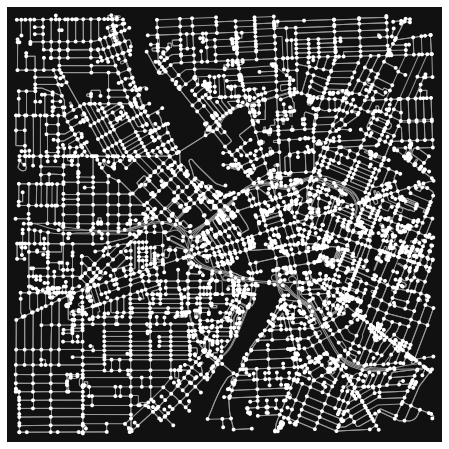

2021-09-26 10:06:04 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [35]:
roc_graph = create_rochester_graph('Rochester', 2500, 'drive_service')
ox.plot_graph(roc_graph)

2021-09-26 10:06:05 Created edges GeoDataFrame from graph
2021-09-26 10:06:05 Created edges GeoDataFrame from graph
2021-09-26 10:06:05 Created nodes GeoDataFrame from graph
2021-09-26 10:06:05 Created nodes GeoDataFrame from graph
2021-09-26 10:06:05 Begin plotting the graph...


/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.

/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.



2021-09-26 10:06:06 Created edges GeoDataFrame from graph
2021-09-26 10:06:07 Finished plotting the graph


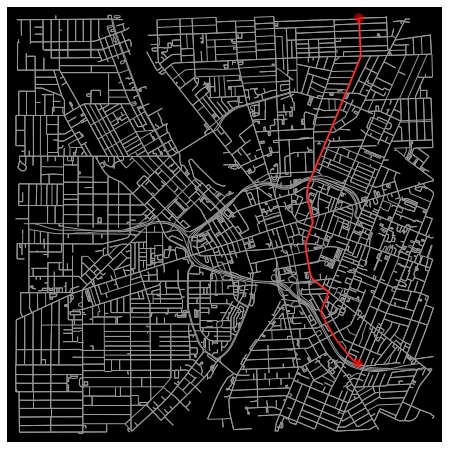

In [36]:
roc_graph = ox.add_edge_speeds(roc_graph) #Impute
roc_graph = ox.add_edge_travel_times(roc_graph) #Travel time
source = (43.14277, -77.59541) #Highland Park
destination = (43.22447, -77.59820)   #West Irondequoit
source_node = ox.get_nearest_node(roc_graph, source)
destination_node = ox.get_nearest_node(roc_graph, destination)
# Calculate the shortest path
path = nx.shortest_path(roc_graph, source_node, destination_node, weight='travel_time')
#Plot the route and street networks
ox.plot_graph_route(roc_graph, path, route_linewidth=3, node_size=0, bgcolor='k');

In [37]:
type(roc_graph)

networkx.classes.multidigraph.MultiDiGraph

In [38]:
type(path)

list

In [39]:
path

[212711088,
 6863491042,
 212711081,
 6950355751,
 6950355754,
 212711079,
 8578511237,
 8578511239,
 212627933,
 8077503695,
 3665094176,
 212890741,
 5371345759,
 212630426,
 212863159,
 212663712,
 212654931,
 7302320094,
 5585330044,
 3415688712,
 391967057,
 212690367,
 212745042,
 212890690,
 212772328,
 212762363,
 212714271,
 212838342,
 212859862,
 5746222889,
 212898187,
 212757743,
 8578366709,
 212666680,
 212681097,
 5745948590,
 212685591,
 212685595,
 212631301,
 7085426685,
 212685599,
 212685602,
 6937268311,
 212685604,
 212627367,
 212685619,
 212685624,
 212685628,
 212685631,
 212685635,
 212685639,
 212685642,
 8021283011,
 212685650,
 212685653,
 212685657,
 212685660,
 212685663,
 212685666,
 212643349,
 212685670,
 212685673,
 212685678,
 212685682,
 212685686,
 212685688,
 212685691]

In [40]:
roc_graph[212711088]

AdjacencyView({6863491042: {0: {'osmid': 20134748, 'oneway': True, 'lanes': '2', 'name': 'Broadway', 'highway': 'tertiary', 'length': 52.534, 'speed_kph': 48.3, 'travel_time': 3.9}}, 212890724: {0: {'osmid': 20139456, 'name': 'Edmonds Street', 'highway': 'residential', 'oneway': False, 'length': 194.015, 'geometry': <shapely.geometry.linestring.LineString object at 0x16ab464c0>, 'speed_kph': 42.6, 'travel_time': 16.4}}})

In [41]:
roc_graph[212629561]

AdjacencyView({8077196381: {0: {'osmid': 20112053, 'name': 'Seager Street', 'highway': 'residential', 'oneway': False, 'length': 29.691, 'speed_kph': 42.6, 'travel_time': 2.5}}, 212629557: {0: {'osmid': 20112053, 'name': 'Seager Street', 'highway': 'residential', 'oneway': False, 'length': 115.935, 'speed_kph': 42.6, 'travel_time': 9.8}}, 212782009: {0: {'osmid': 20124517, 'name': 'Benton Street', 'highway': 'residential', 'oneway': False, 'length': 60.861, 'speed_kph': 42.6, 'travel_time': 5.1}}, 212782005: {0: {'osmid': 20124517, 'name': 'Benton Street', 'highway': 'residential', 'oneway': False, 'length': 58.372, 'speed_kph': 42.6, 'travel_time': 4.9}}})

In [42]:
import json
print(roc_graph[212711088].values())

ValuesView(AdjacencyView({6863491042: {0: {'osmid': 20134748, 'oneway': True, 'lanes': '2', 'name': 'Broadway', 'highway': 'tertiary', 'length': 52.534, 'speed_kph': 48.3, 'travel_time': 3.9}}, 212890724: {0: {'osmid': 20139456, 'name': 'Edmonds Street', 'highway': 'residential', 'oneway': False, 'length': 194.015, 'geometry': <shapely.geometry.linestring.LineString object at 0x16ab464c0>, 'speed_kph': 42.6, 'travel_time': 16.4}}}))


In [43]:
node_source = []
node_destination = []
X_to = []
Y_to = []
X_from = []
Y_from = []
length = []
travel_time = []
for a, b in zip(path[:-1], path[1:]):
    node_source.append(a)
    node_destination.append(b)
    length.append(round(roc_graph.edges[(a, b, 0)]['length']))
    travel_time.append(round(roc_graph.edges[(a, b, 0)]['travel_time']))
    X_from.append(roc_graph.nodes[a]['x'])
    Y_from.append(roc_graph.nodes[a]['y'])
    X_to.append(roc_graph.nodes[b]['x'])
    Y_to.append(roc_graph.nodes[b]['y'])

In [44]:
df = pd.DataFrame(list(zip(node_source, node_destination, X_from, Y_from, X_to, Y_to, length, travel_time)),
columns =['node_source', 'node_destination', 'X_from', 'Y_from', 'X_to', 'Y_to', 'length', 'travel_time'])
df.head()

node_source  node_destination     X_from     Y_from       X_to       Y_to  \
0    212711088        6863491042 -77.595508  43.142408 -77.596055  43.142662   
1   6863491042         212711081 -77.596055  43.142662 -77.597028  43.143370   
2    212711081        6950355751 -77.597028  43.143370 -77.597459  43.143770   
3   6950355751        6950355754 -77.597459  43.143770 -77.598380  43.144625   
4   6950355754         212711079 -77.598380  43.144625 -77.599238  43.145524   

   length  travel_time  
0      53            4  
1     112            8  
2      57            4  
3     121            9  
4     122            9

In [45]:
def create_line_gdf(df):
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X_from, df.Y_from))
    gdf["geometry_to"] = [Point(xy) for xy in zip(gdf.X_to, gdf.Y_to)]
    gdf['line'] = gdf.apply(lambda row: LineString([row['geometry_to'], row['geometry']]), axis=1)
    line_gdf = gdf[["node_source","node_destination","length","travel_time", "line"]].set_geometry('line')
    return line_gdf

In [46]:
line_gdf = create_line_gdf(df)

<AxesSubplot:>

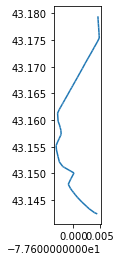

In [47]:
line_gdf.plot()

In [48]:
line_gdf.head()

node_source  node_destination  length  travel_time  \
0    212711088        6863491042      53            4   
1   6863491042         212711081     112            8   
2    212711081        6950355751      57            4   
3   6950355751        6950355754     121            9   
4   6950355754         212711079     122            9   

                                                line  
0  LINESTRING (-77.59605 43.14266, -77.59551 43.1...  
1  LINESTRING (-77.59703 43.14337, -77.59605 43.1...  
2  LINESTRING (-77.59746 43.14377, -77.59703 43.1...  
3  LINESTRING (-77.59838 43.14463, -77.59746 43.1...  
4  LINESTRING (-77.59924 43.14552, -77.59838 43.1...

In [49]:
df.tail()

node_source  node_destination     X_from     Y_from       X_to       Y_to  \
61    212685673         212685678 -77.595189  43.176419 -77.595250  43.177343   
62    212685678         212685682 -77.595250  43.177343 -77.595304  43.178109   
63    212685682         212685686 -77.595304  43.178109 -77.595351  43.178848   
64    212685686         212685688 -77.595351  43.178848 -77.595379  43.179348   
65    212685688         212685691 -77.595379  43.179348 -77.595383  43.179460   

    length  travel_time                    geometry  \
61     103            8  POINT (-77.59519 43.17642)   
62      85            6  POINT (-77.59525 43.17734)   
63      82            6  POINT (-77.59530 43.17811)   
64      56            4  POINT (-77.59535 43.17885)   
65      12            1  POINT (-77.59538 43.17935)   

                             geometry_to  \
61  POINT (-77.59524999999999 43.177343)   
62          POINT (-77.595304 43.178109)   
63  POINT (-77.59535099999999 43.178848)   
64  POINT (-77.59537899999999 43.179348)   
65           POINT (-77.595383 43.17946)   

                                                 line  
61  LINESTRING (-77.59524999999999 43.177343, -77....  
62  LINESTRING (-77.595304 43.178109, -77.59524999...  
63  LINESTRING (-77.59535099999999 43.178848, -77....  
64  LINESTRING (-77.59537899999999 43.179348, -77....  
65  LINESTRING (-77.595383 43.17946, -77.595378999...

In [50]:
start = df[df["node_source"] == source_node]
end = df[df["node_destination"] == destination_node]

In [51]:
start

node_source  node_destination     X_from     Y_from       X_to       Y_to  \
0    212711088        6863491042 -77.595508  43.142408 -77.596055  43.142662   

   length  travel_time                    geometry  \
0      53            4  POINT (-77.59551 43.14241)   

                      geometry_to  \
0  POINT (-77.5960549 43.1426618)   

                                                line  
0  LINESTRING (-77.5960549 43.1426618, -77.595508...

In [52]:
end

node_source  node_destination     X_from     Y_from       X_to      Y_to  \
65    212685688         212685691 -77.595379  43.179348 -77.595383  43.17946   

    length  travel_time                    geometry  \
65      12            1  POINT (-77.59538 43.17935)   

                    geometry_to  \
65  POINT (-77.595383 43.17946)   

                                                 line  
65  LINESTRING (-77.595383 43.17946, -77.595378999...

In [53]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(df, lon= "X_from", lat="Y_from", zoom=12)

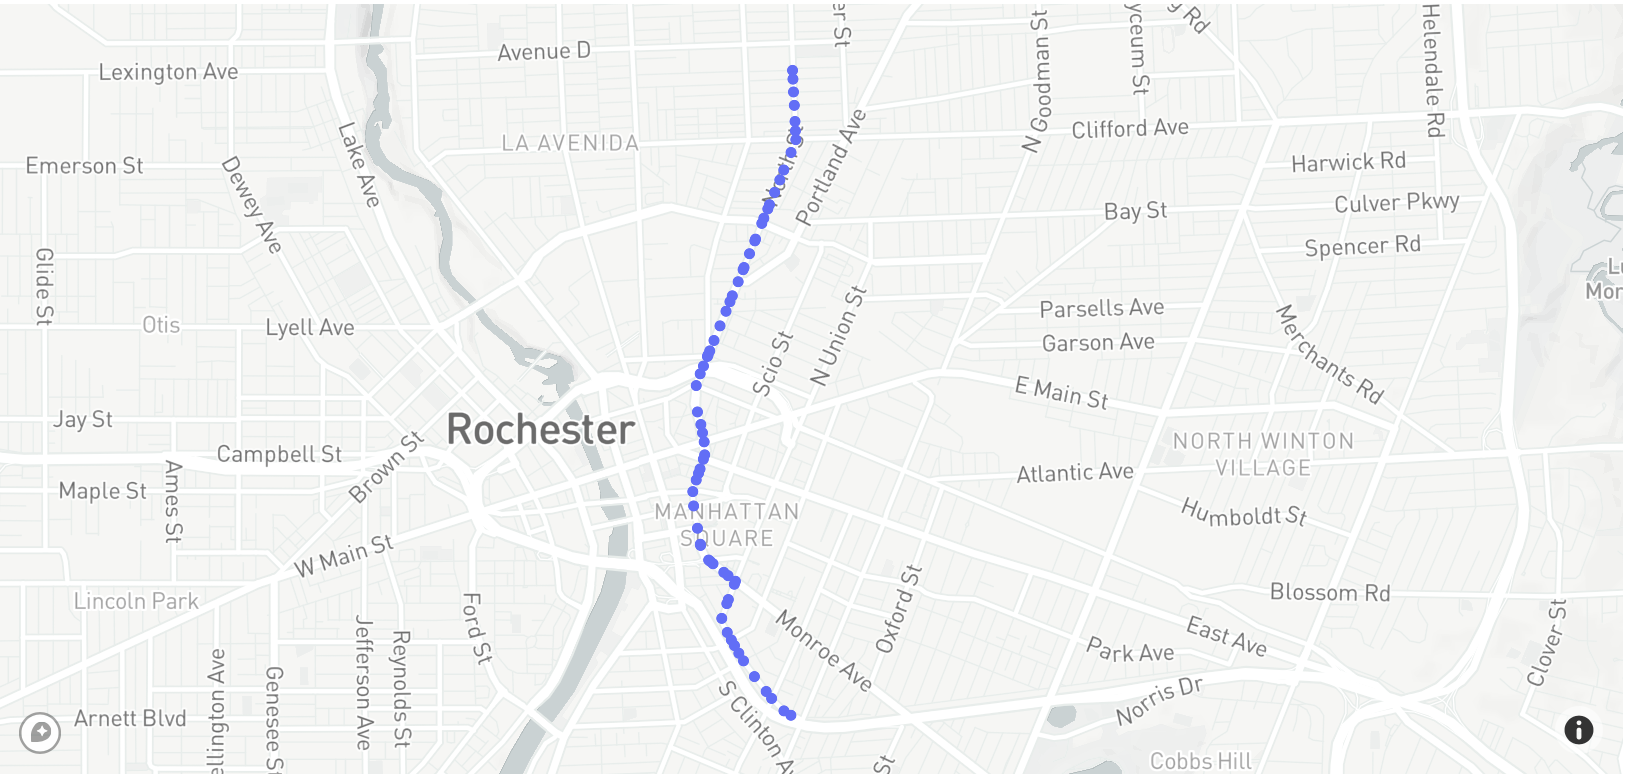

In [54]:
from IPython.display import Image
#Output from px.scatter_mapbox because the output isnt visible on github while pushing the notebook
Image(filename = "markings-from-source-to-dest.png", width = 700, height = 400)

In [55]:
fig = px.scatter_mapbox(df, lon= "X_from", lat="Y_from", width=800, height=400, zoom=12)
fig.add_trace(px.line_mapbox(df, lon= "X_from", lat="Y_from").data[0])

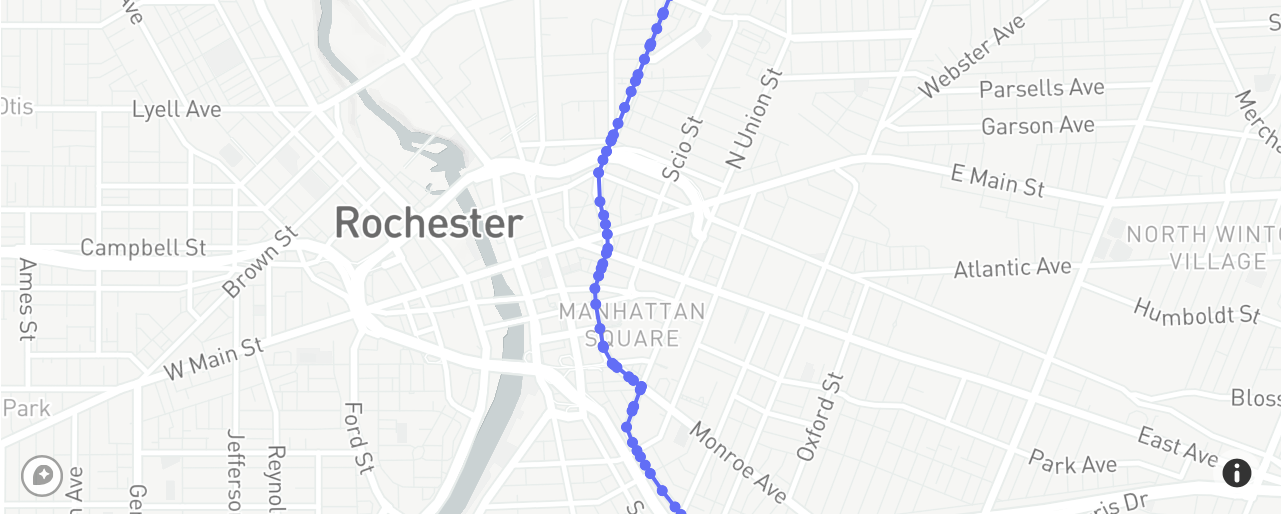

In [56]:
from IPython.display import Image
#Output (zoomed out) from fig.add_trace because the output isnt visible on github while pushing the notebook
Image(filename = "Trace-zoomed out.png", width = 700, height = 400)

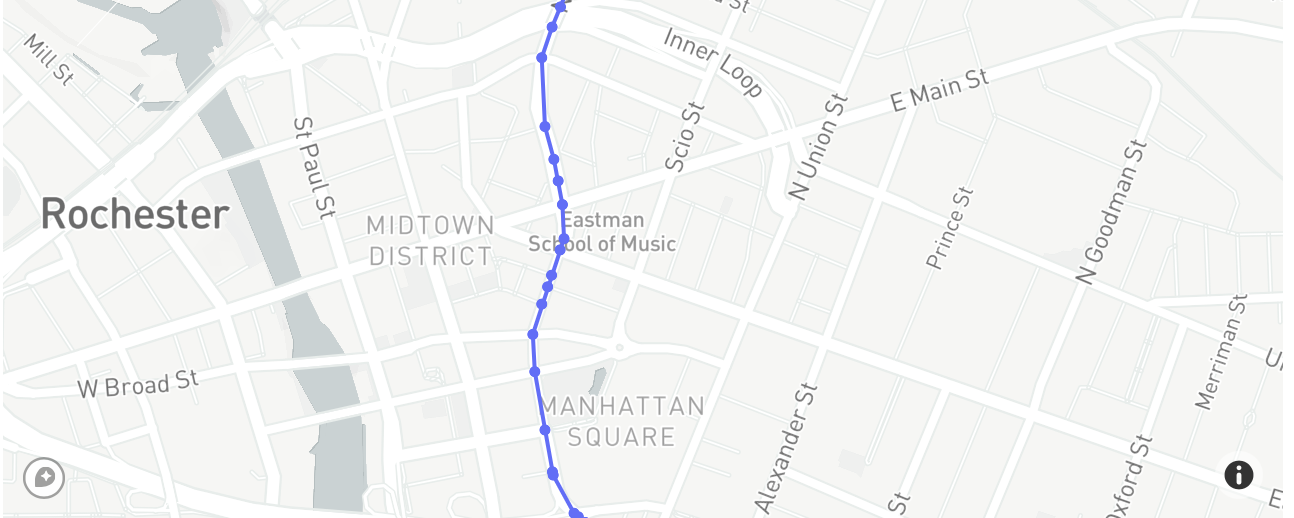

In [57]:
from IPython.display import Image
#Output (zoomed in) from fig.add_trace because the output isnt visible on github while pushing the notebook
Image(filename = "Trace-zoomed-in.png", width = 700, height = 400)

In [58]:
fig = px.scatter_mapbox(df, lon= "X_from", lat="Y_from", zoom=13, width=1000, height=800, animation_frame=df.index,mapbox_style="dark")
fig.data[0].marker = dict(size = 12, color="black")
fig.add_trace(px.scatter_mapbox(start, lon= "X_from", lat="Y_from").data[0])
fig.data[1].marker = dict(size = 15, color="red")
fig.add_trace(px.scatter_mapbox(end, lon= "X_from", lat="Y_from").data[0])
fig.data[2].marker = dict(size = 15, color="green")
fig.add_trace(px.line_mapbox(df, lon= "X_from", lat="Y_from").data[0])
fig

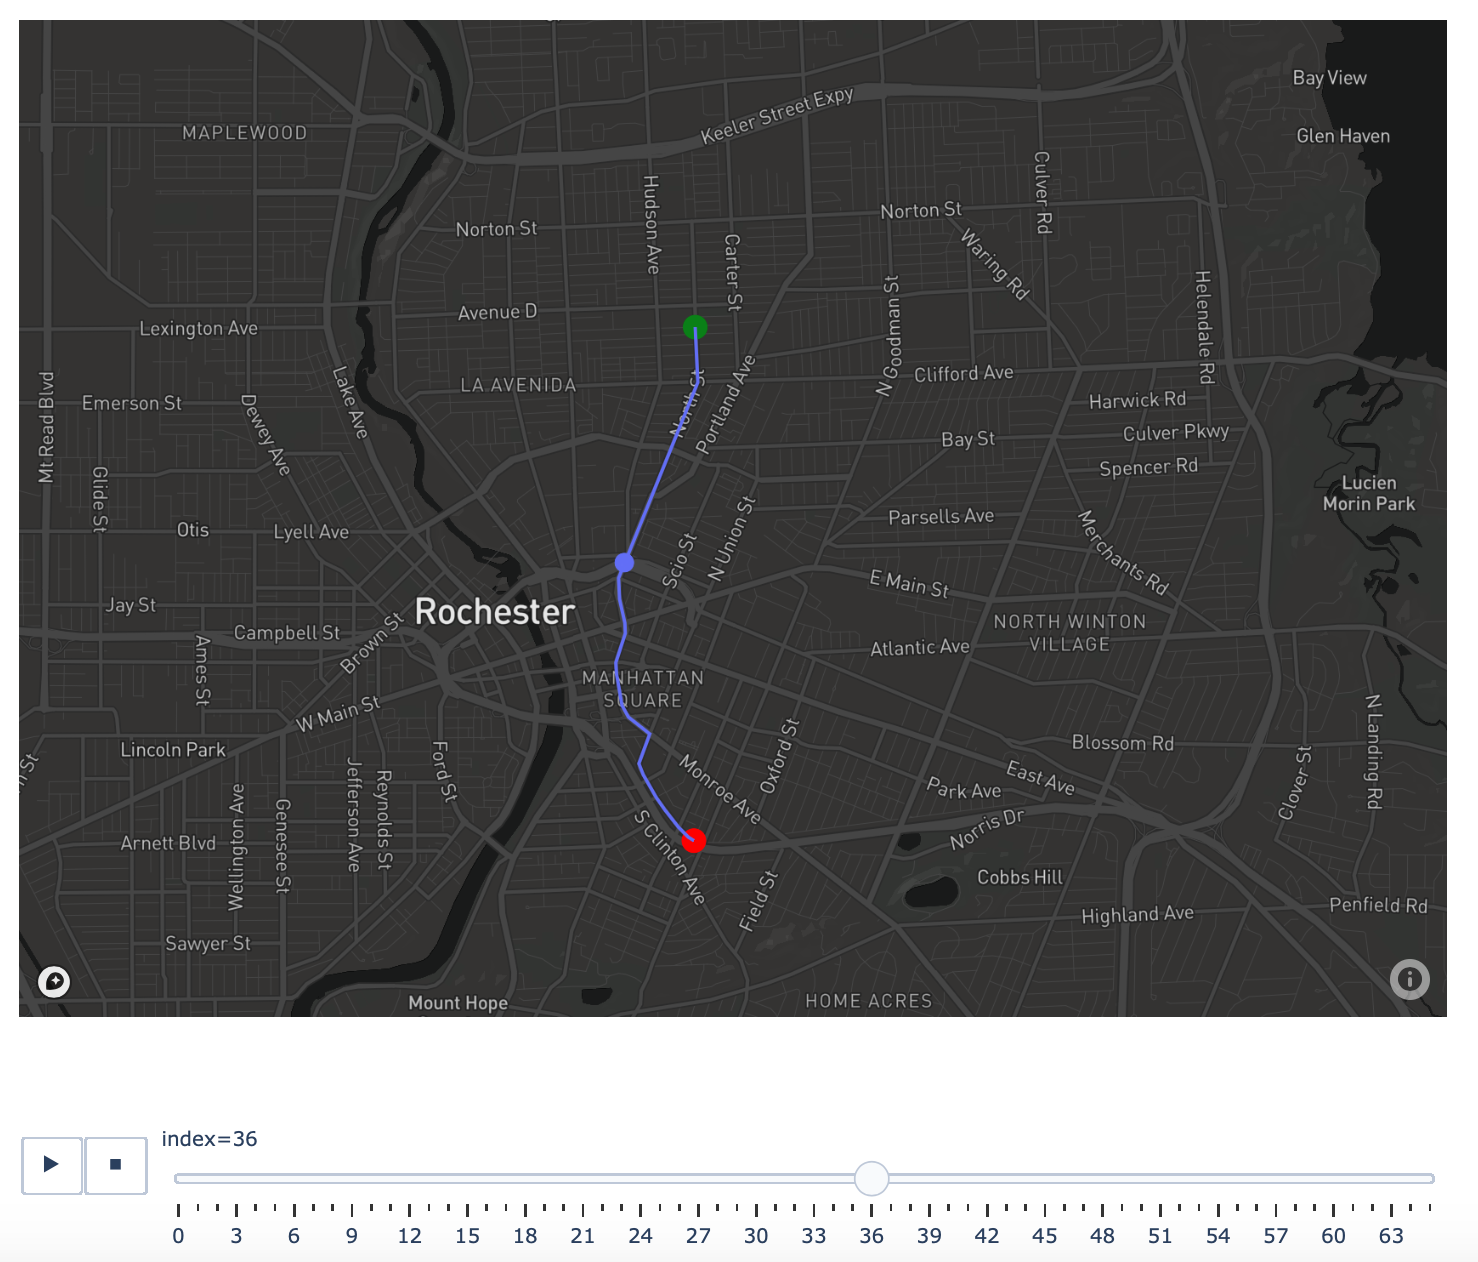

In [61]:
from IPython.display import Image
#Output for traversal of the path becasue the video is not visible on github. The purple circle 
#in the middle traverses the path from source to destination in a video form
Image(filename = "Animated-sample-of-Traversal.png", width = 700, height = 400)